In [1]:
#importando o tensor flow
import tensorflow as tf
#importando o keras
from tensorflow import keras

In [2]:
#importando o dataset fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
#separando os dados de treino e teste
(X_treinoc,y_treinoc),(X_teste,y_teste)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#criando o conjunto de validação dentro do dataset de treino
X_valid,X_train = X_treinoc[:5000]/255.0, X_treinoc[5000:]/255.0
y_valid,y_train = y_treinoc[:5000], y_treinoc[5000:]
#Dando nome as classes/labels
n_classes = ["T-shirt", "calça","casaquinho","vestido","casaco","sandalia","camisa","tenis","mochila","bota"]
n_classes[y_train[0]]

'casaco'

In [4]:
#criando o primeiro MultiLayer Perceptron
modelo = keras.models.Sequential()
modelo.add(keras.layers.Flatten(input_shape=[28,28]))
modelo.add(keras.layers.Dense(300,activation="relu"))
modelo.add(keras.layers.Dense(100,activation="relu"))
modelo.add(keras.layers.Dense(10,activation="softmax"))


In [5]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


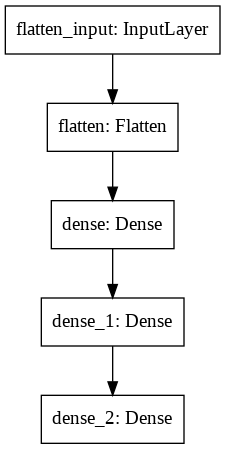

In [6]:
keras.utils.plot_model(modelo)

In [7]:
#alterando o nome da camada
hidden1= modelo.layers[1]

In [8]:
#Todos os parâmetros podem ser alterados utilizando a função get_weights
pesos,bias = hidden1.get_weights()
pesos

array([[ 0.0107512 ,  0.00550177,  0.04570071, ...,  0.00478598,
         0.05445755, -0.02773837],
       [-0.06872889,  0.02861621, -0.00482273, ...,  0.03891474,
        -0.05264685,  0.04404578],
       [ 0.05397767, -0.07077655,  0.03704836, ...,  0.07424971,
         0.04289948, -0.02202367],
       ...,
       [-0.02831971, -0.03771845,  0.05537046, ...,  0.06267273,
         0.00321293, -0.03002439],
       [ 0.01720911, -0.06818967,  0.03392654, ..., -0.00356325,
        -0.03121128, -0.02866368],
       [ 0.01898231, -0.03346691, -0.0712564 , ...,  0.02083529,
         0.00703962, -0.06157034]], dtype=float32)

In [9]:
#Compilando
modelo.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [10]:
#Treinando e Avaliando o modeloo
history = modelo.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7169 - accuracy: 0.7683 - val_loss: 0.5314 - val_accuracy: 0.8208
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4888 - accuracy: 0.8302 - val_loss: 0.4492 - val_accuracy: 0.8480
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4438 - accuracy: 0.8437 - val_loss: 0.4908 - val_accuracy: 0.8262
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4137 - accuracy: 0.8542 - val_loss: 0.4012 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3937 - accuracy: 0.8618 - val_loss: 0.3786 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3786 - accuracy: 0.8651 - val_loss: 0.3731 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8704 - val_loss: 0.3790 - val_accuracy:

In [14]:
modelo.evaluate(X_teste,y_teste)

313/313 [==============================] - 1s 2ms/step - loss: 68.8116 - accuracy: 0.8445


[68.81163024902344, 0.8445000052452087]

In [16]:
#Fazendo predições
X_new= X_teste[:10]
y_proba = modelo.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [17]:
#Fazendo as predições Parte 2
y_pred = modelo.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [18]:
#Fazendo as prediçoes Parte 3
import numpy as np
np.array(n_classes)[y_pred]

array(['bota', 'casaquinho', 'calça', 'calça', 'camisa', 'calça',
       'casaco', 'camisa', 'sandalia', 'tenis'], dtype='<U10')

In [19]:
#Predições parte 4
#Predição de todos os dados
y_pred2 = modelo.predict_classes(X_teste)
y_pred2

array([9, 2, 1, ..., 8, 1, 5])